<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [27]:
# Import necessary libraries
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# PyTorch version
torch.__version__

'2.7.1'

In [28]:
# Setup device-agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [37]:
# Create the data parameters
WEIGHT = 0.3
BIAS = 0.9

# data params
START = 0
END = 1
STEP = 0.02

# Make X and y using linear regression feature
X = torch.arange(START, END, STEP).unsqueeze(1)
y = X * WEIGHT + BIAS

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 50
Number of y samples: 50
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240],
        [0.9300],
        [0.9360],
        [0.9420],
        [0.9480],
        [0.9540]])


In [38]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

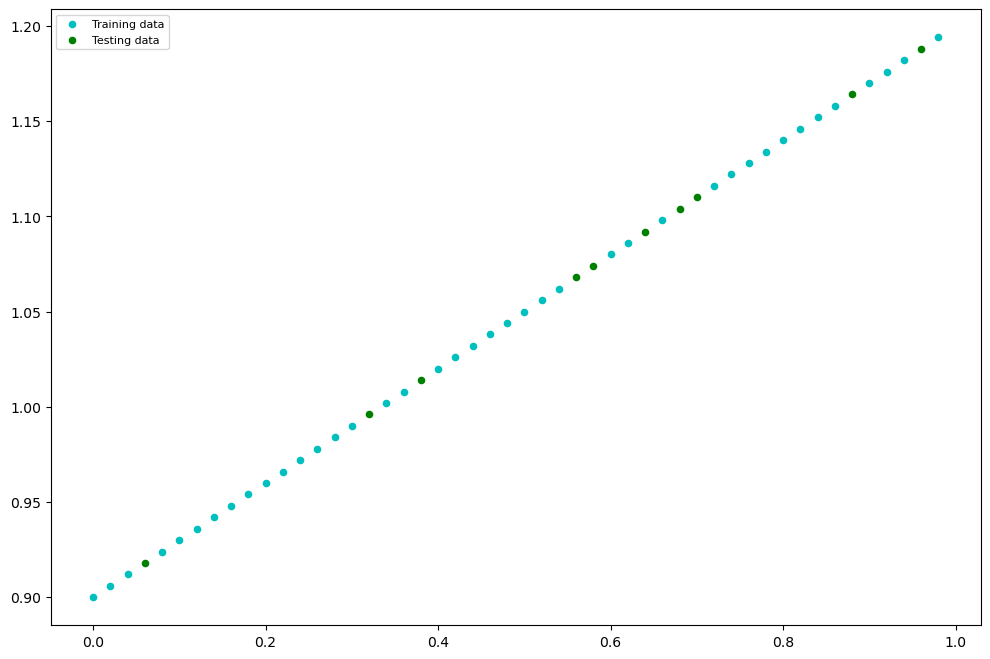

In [39]:
# Plot the training and testing data
def plot_predictions(train_params= X_train,
                     train_labels= y_train,
                     test_params= X_test,
                     test_labels= y_test,
                     predictions= None):
    plt.figure(figsize=(12, 8))

    # Plot training data in blue
    plt.scatter(train_params, train_labels, c="c", s=20, label="Training data")

    # Plot test data in green
    plt.scatter(test_params, test_labels, c="g", s=20, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_params, predictions, c="r", s=20, label="Predictions")

    # Show the legend
    plt.legend(prop={'size': 8})
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [52]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [56]:
# Instantiate the model and put it to the target device
model = LinearRegression()
model, model.state_dict(), model.to(device)

(LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ))

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [57]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [58]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs (let it be 1_000)
epochs = 1_000

# Send data to target device
map(lambda x: x.to(device), [X_train, X_test, y_train, y_test])

for epoch in range(epochs):
    ### Training

    # Put model in train mode
    model.train()

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    model.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Perform testing every 20 epochs
    if epoch % 20 == 0:
        # Put model in evaluation mode and setup inference context
        # model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_pred = model(X_test)
            # 2. Calculate test loss
            test_loss = loss_fn(test_pred, y_test)

        # Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.161 | Test loss: 0.205
Epoch: 20 | Train loss: 0.149 | Test loss: 0.191
Epoch: 40 | Train loss: 0.140 | Test loss: 0.177
Epoch: 60 | Train loss: 0.132 | Test loss: 0.165
Epoch: 80 | Train loss: 0.125 | Test loss: 0.154
Epoch: 100 | Train loss: 0.120 | Test loss: 0.144
Epoch: 120 | Train loss: 0.115 | Test loss: 0.135
Epoch: 140 | Train loss: 0.111 | Test loss: 0.127
Epoch: 160 | Train loss: 0.108 | Test loss: 0.120
Epoch: 180 | Train loss: 0.104 | Test loss: 0.114
Epoch: 200 | Train loss: 0.102 | Test loss: 0.109
Epoch: 220 | Train loss: 0.099 | Test loss: 0.104
Epoch: 240 | Train loss: 0.097 | Test loss: 0.100
Epoch: 260 | Train loss: 0.095 | Test loss: 0.096
Epoch: 280 | Train loss: 0.093 | Test loss: 0.093
Epoch: 300 | Train loss: 0.091 | Test loss: 0.090
Epoch: 320 | Train loss: 0.089 | Test loss: 0.088
Epoch: 340 | Train loss: 0.088 | Test loss: 0.085
Epoch: 360 | Train loss: 0.087 | Test loss: 0.083
Epoch: 380 | Train loss: 0.086 | Test loss: 0.081
Epoch:

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [59]:
# Make predictions with the model
model.eval()
y_preds = model(X_test)
y_preds = y_preds.cpu().detach().numpy()

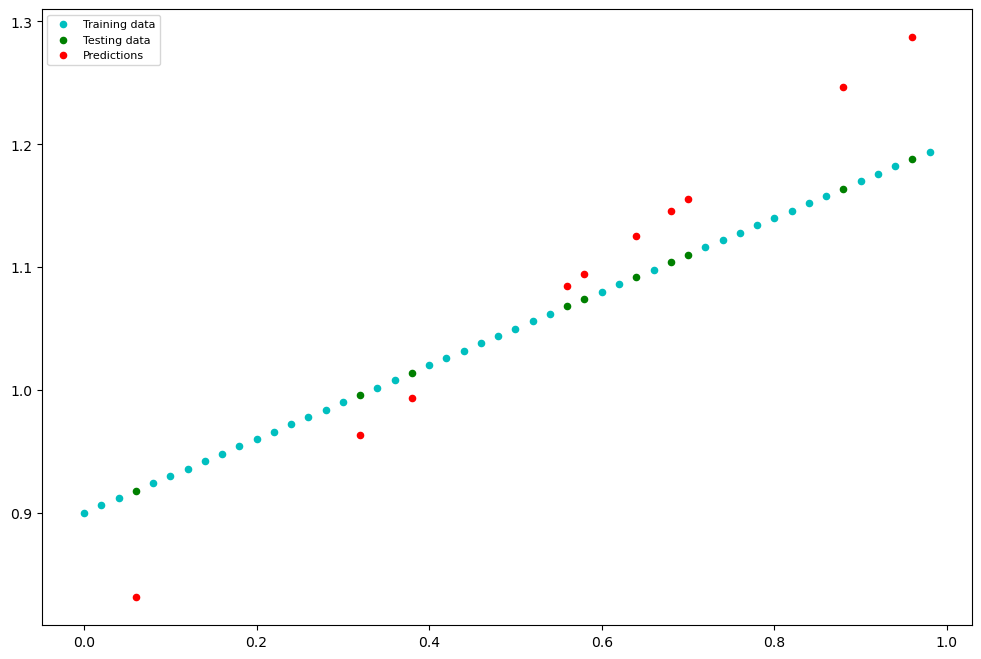

In [60]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions = y_preds)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [61]:
from pathlib import Path

# 1. Create models directory 
Model_PATH = Path("models")
Model_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_exercise_model.pth"
MODEL_SAVE_PATH = Model_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(model.state_dict(), MODEL_SAVE_PATH)

In [62]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model2 = LinearRegression()
model2.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

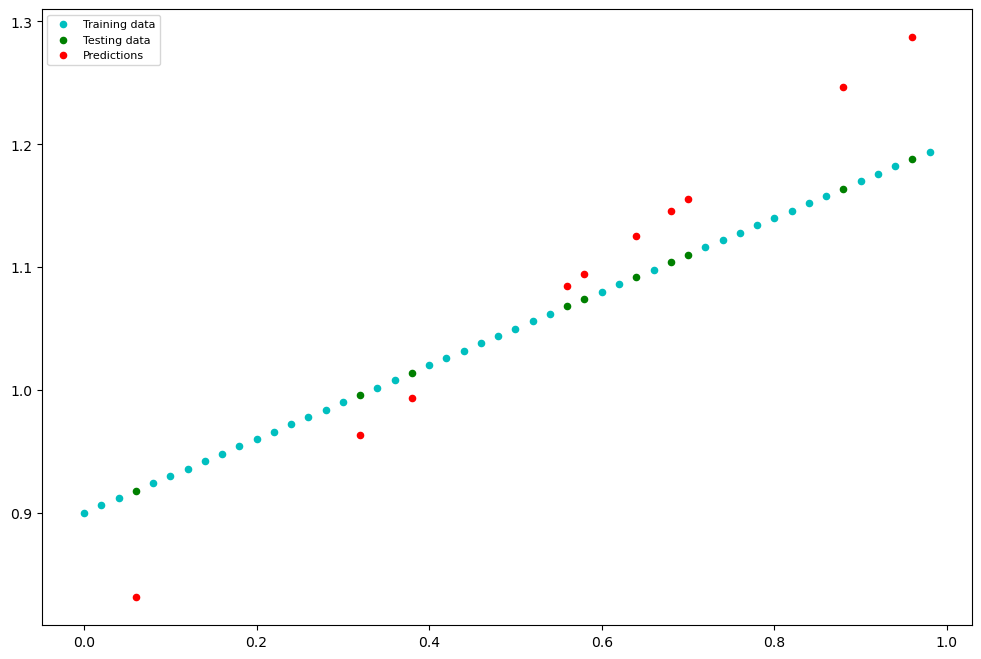

In [63]:
# Make predictions with loaded model and compare them to the previous
model2.eval()
y_preds = model2(X_test)
y_preds = y_preds.cpu().detach().numpy()
plot_predictions(predictions = y_preds)